In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data_test_clean.csv', index_col='id')
df.head()

,sub_area,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,metro_km_walk,kremlin_km,price_doc
id,,,,,,,,,,,,,,,
21121,Severnoe Tushino,2014-07-28,33,19.0,9.0,9.0,1.0,1968.0,1.0,6.0,2.0,Investment,1.357884,15.845849,5500000
21995,Severnoe Butovo,2014-08-28,38,19.0,5.0,17.0,1.0,1990.0,1.0,8.0,2.0,Investment,1.327595,20.389760,6150000
17166,Izmajlovo,2014-04-09,76,59.0,2.0,5.0,2.0,1954.0,3.0,4.0,3.0,Investment,0.697208,11.471116,10600000
11353,Nekrasovka,2013-10-18,63,60.0,2.0,17.0,1.0,2015.0,2.0,12.0,1.0,OwnerOccupier,3.776836,20.549464,6008354
28893,Zapadnoe Degunino,2015-04-05,35,19.0,11.0,12.0,5.0,1967.0,1.0,9.0,3.0,Investment,1.251811,13.409870,6150000


In [3]:
df[df['build_year'] < 100]

,sub_area,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,metro_km_walk,kremlin_km,price_doc
id,,,,,,,,,,,,,,,


In [4]:
data = df[['full_sq', 'floor', 'max_floor', 'num_room', 'build_year']]

In [5]:
data

,full_sq,floor,max_floor,num_room,build_year
id,,,,,
21121,33,9.0,9.0,1.0,1968.0
21995,38,5.0,17.0,1.0,1990.0
17166,76,2.0,5.0,3.0,1954.0
11353,63,2.0,17.0,2.0,2015.0
28893,35,11.0,12.0,1.0,1967.0
...,...,...,...,...,...
18192,42,3.0,5.0,2.0,1962.0
17872,75,2.0,1.0,2.0,2014.0
21589,80,15.0,15.0,3.0,2015.0


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm = scaler.fit_transform(data)
df_norm = pd.DataFrame(norm, columns=['full_sq', 'floor', 'max_floor', 'num_room', 'build_year'])

In [7]:
df_norm

,full_sq,floor,max_floor,num_room,build_year
0,0.079602,0.333333,0.173913,0.000000,0.395062
1,0.104478,0.166667,0.347826,0.000000,0.666667
2,0.293532,0.041667,0.086957,0.333333,0.222222
3,0.228856,0.041667,0.347826,0.166667,0.975309
4,0.089552,0.416667,0.239130,0.000000,0.382716
...,...,...,...,...,...
495,0.124378,0.083333,0.086957,0.166667,0.320988
496,0.288557,0.041667,0.000000,0.166667,0.962963
497,0.313433,0.583333,0.304348,0.333333,0.975309
498,0.223881,0.458333,0.347826,0.166667,0.987654


In [9]:
from sklearn.cluster import KMeans

def find_best_kmeans(df, count_init, n_clusters):
    best_loss = 2147483647
    best_kmean = None
    for i in range(count_init):
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(df)
        loss = kmeans.inertia_
        if loss < best_loss:
            best_loss = loss
            best_kmeans = kmeans
    print(best_loss)
    return kmeans
    
kmeans5 = find_best_kmeans(norm, 10, 5)

28.069757918896112


In [10]:
kmeans9 = find_best_kmeans(norm, 10, 9)

19.412777589829215


In [11]:
df_norm

,full_sq,floor,max_floor,num_room,build_year
0,0.079602,0.333333,0.173913,0.000000,0.395062
1,0.104478,0.166667,0.347826,0.000000,0.666667
2,0.293532,0.041667,0.086957,0.333333,0.222222
3,0.228856,0.041667,0.347826,0.166667,0.975309
4,0.089552,0.416667,0.239130,0.000000,0.382716
...,...,...,...,...,...
495,0.124378,0.083333,0.086957,0.166667,0.320988
496,0.288557,0.041667,0.000000,0.166667,0.962963
497,0.313433,0.583333,0.304348,0.333333,0.975309
498,0.223881,0.458333,0.347826,0.166667,0.987654


In [12]:
from sklearn.manifold import TSNE
tsne = pd.DataFrame(TSNE(n_components=2).fit_transform(df_norm), columns=['first', 'second'])
tsne['label'] = kmeans9.labels_
data['label'] = kmeans9.labels_

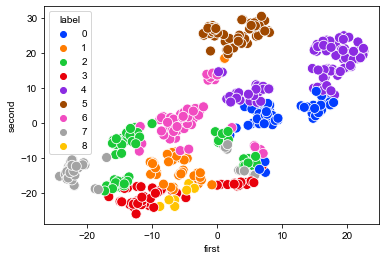

In [13]:
import seaborn as sns 
sns.scatterplot(data=tsne, x="first", y="second", hue='label', palette = 'bright', s=100)
sns.set(rc={'figure.figsize':(15,12)})

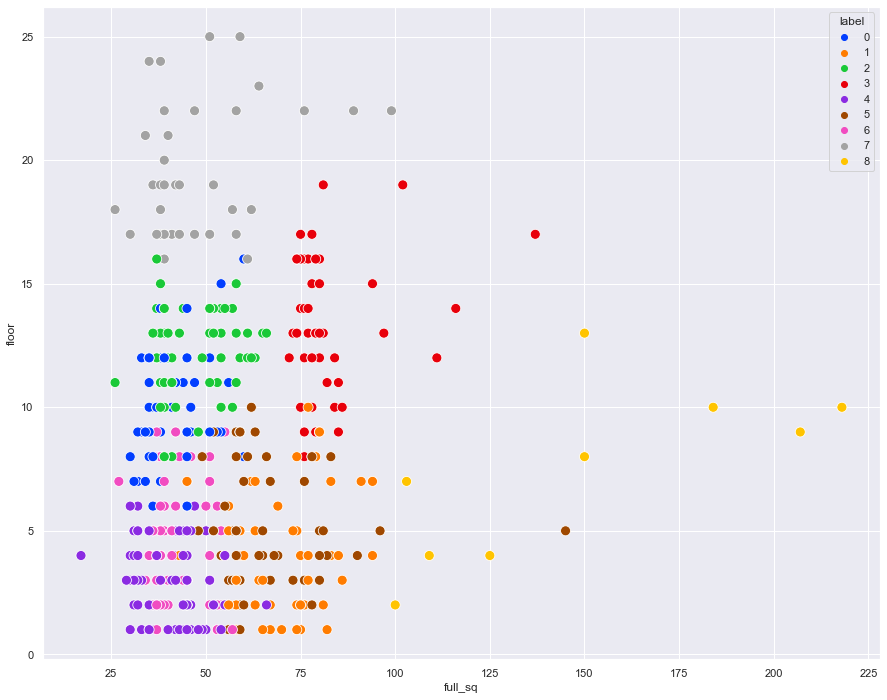

In [14]:
# 'full_sq', 'floor', 'max_floor', 'num_room', 'build_year'
sns.scatterplot(data=data, x="full_sq", y="floor", hue='label', palette = 'bright', s=100)
sns.set(rc={'figure.figsize':(15,12)})

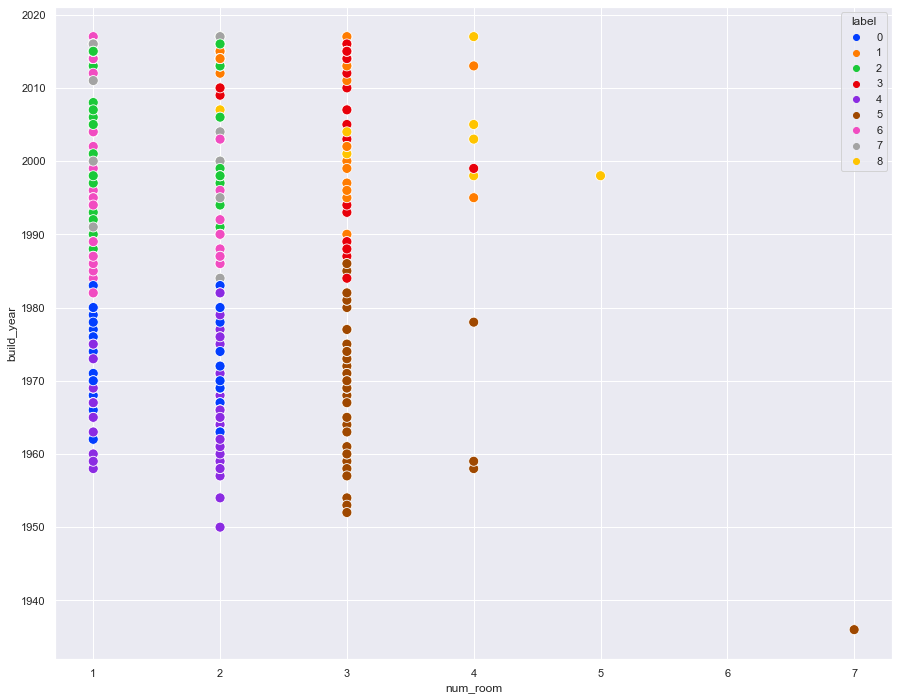

In [15]:
# 'full_sq', 'floor', 'max_floor', 'num_room', 'build_year'
sns.scatterplot(data=data, x="num_room", y="build_year", hue='label', palette = 'bright', s=100)
sns.set(rc={'figure.figsize':(15,12)})

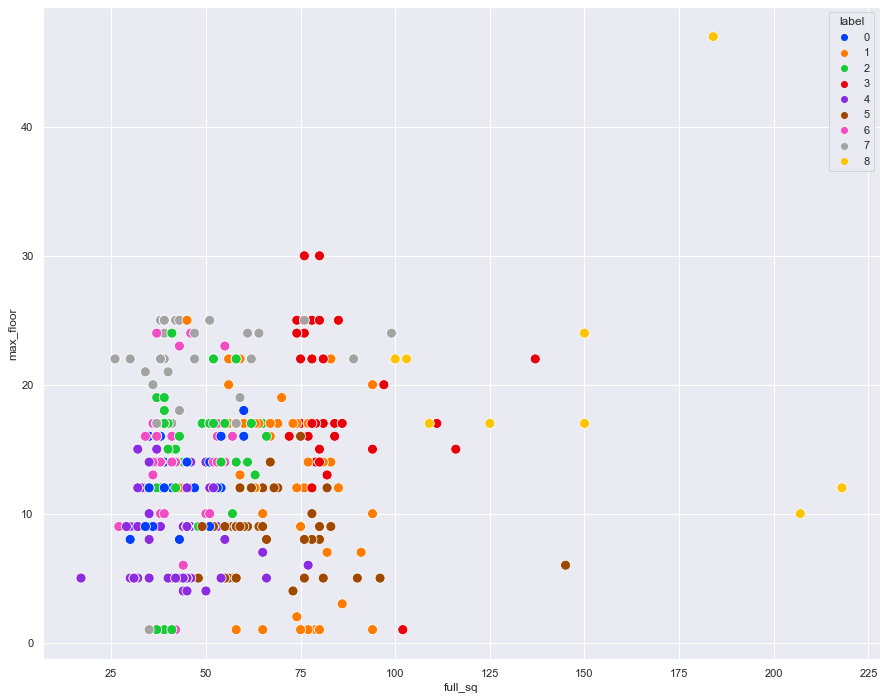

In [16]:
# 'full_sq', 'floor', 'max_floor', 'num_room', 'build_year'
sns.scatterplot(data=data, x="full_sq", y="max_floor", hue='label', palette = 'bright', s=100)
sns.set(rc={'figure.figsize':(15,12)})

In [17]:
data['label'] = list(tsne['label'])
data

,full_sq,floor,max_floor,num_room,build_year,label
id,,,,,,
21121,33,9.0,9.0,1.0,1968.0,0
21995,38,5.0,17.0,1.0,1990.0,6
17166,76,2.0,5.0,3.0,1954.0,5
11353,63,2.0,17.0,2.0,2015.0,1
28893,35,11.0,12.0,1.0,1967.0,0
...,...,...,...,...,...,...
18192,42,3.0,5.0,2.0,1962.0,4
17872,75,2.0,1.0,2.0,2014.0,1
21589,80,15.0,15.0,3.0,2015.0,3


In [18]:
data[data['label'] == 0].describe()

,full_sq,floor,max_floor,num_room,build_year,label
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.0
mean,40.966667,9.766667,12.050000,1.516667,1972.733333,0.0
std,7.341470,2.181328,2.613038,0.503939,6.607306,0.0
min,30.000000,6.000000,8.000000,1.000000,1962.000000,0.0
25%,35.000000,8.000000,9.000000,1.000000,1968.750000,0.0
50%,38.500000,9.000000,12.000000,2.000000,1971.000000,0.0
75%,45.000000,11.000000,14.000000,2.000000,1976.250000,0.0
max,60.000000,16.000000,18.000000,2.000000,1988.000000,0.0


In [19]:
data[data['label'] == 1]

,full_sq,floor,max_floor,num_room,build_year,label
id,,,,,,
11353,63,2.0,17.0,2.0,2015.0,1
15404,83,7.0,22.0,3.0,2007.0,1
11866,83,4.0,14.0,3.0,2002.0,1
9681,85,4.0,12.0,3.0,2001.0,1
9913,79,8.0,1.0,3.0,2013.0,1
19518,58,1.0,1.0,2.0,2013.0,1
24414,74,5.0,17.0,3.0,2014.0,1
29263,76,2.0,12.0,3.0,2000.0,1
12259,58,2.0,17.0,2.0,2013.0,1


In [20]:
data[data['label'] == 2].describe()

,full_sq,floor,max_floor,num_room,build_year,label
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.0
mean,47.375000,12.218750,15.734375,1.484375,2006.984375,2.0
std,9.352871,1.768048,4.343366,0.503706,9.186761,0.0
min,26.000000,8.000000,1.000000,1.000000,1988.000000,2.0
25%,39.000000,11.000000,14.000000,1.000000,1998.000000,2.0
50%,46.500000,12.000000,17.000000,1.000000,2013.000000,2.0
75%,54.250000,14.000000,17.000000,2.000000,2015.000000,2.0
max,66.000000,16.000000,24.000000,2.000000,2017.000000,2.0


In [21]:
data[data['label'] == 3].describe()

,full_sq,floor,max_floor,num_room,build_year,label
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.0
mean,81.938776,13.163265,17.959184,2.877551,2006.571429,3.0
std,12.026721,2.874797,5.541357,0.389051,11.563232,0.0
min,72.000000,8.000000,1.000000,2.000000,1982.000000,3.0
25%,76.000000,11.000000,16.000000,3.000000,1995.000000,3.0
50%,78.000000,13.000000,17.000000,3.000000,2014.000000,3.0
75%,81.000000,16.000000,22.000000,3.000000,2015.000000,3.0
max,137.000000,19.000000,30.000000,4.000000,2017.000000,3.0


In [22]:
data[data['label'] == 4].describe()

,full_sq,floor,max_floor,num_room,build_year,label
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.0
mean,42.287037,3.240741,7.361111,1.750000,1965.777778,4.0
std,8.396763,1.593623,3.040101,0.435031,5.836292,0.0
min,17.000000,1.000000,4.000000,1.000000,1950.000000,4.0
25%,36.000000,2.000000,5.000000,1.750000,1962.000000,4.0
50%,44.000000,3.000000,5.000000,2.000000,1965.000000,4.0
75%,45.000000,5.000000,9.000000,2.000000,1969.000000,4.0
max,77.000000,6.000000,15.000000,2.000000,1982.000000,4.0


Лучше 9 кластеров чем 5 тк среднее расстояние в квадрате до центров классов меньше, да и визуално видно что классы лучще, а переобучением и не пахнет.

### PCA

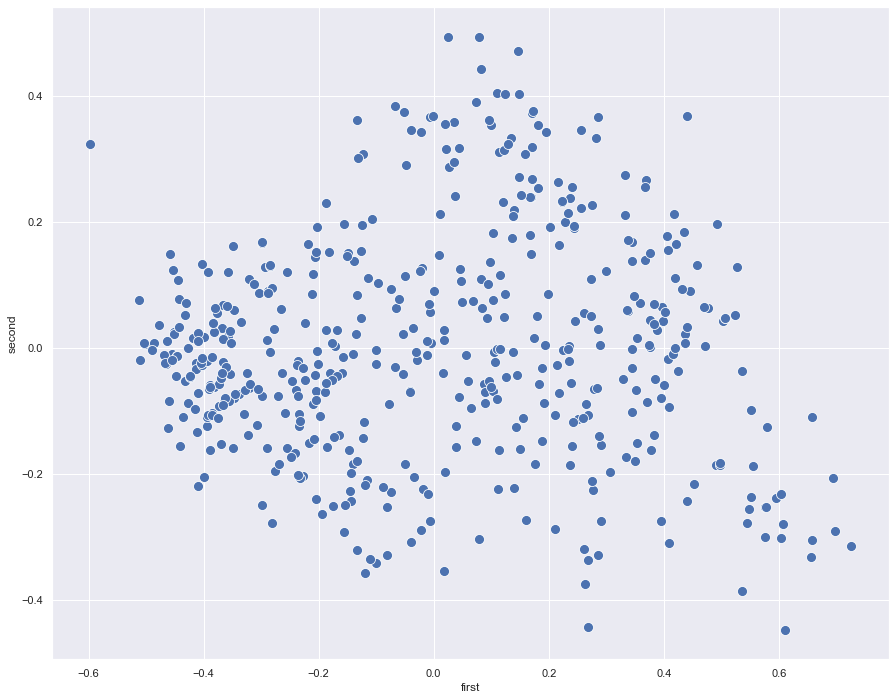

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_norm)
pca_df = pd.DataFrame(pca.transform(df_norm), columns=['first', 'second'])
sns.scatterplot(data=pca_df, x="first", y="second", palette = 'bright', s=100)
sns.set(rc={'figure.figsize':(15,12)})